## 1. Preliminary Modeling - Predicting NBA Steals + Blocks

### 1.1 Load Data

In [136]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,StackingRegressor
import seaborn as sns
from scipy.stats import beta as bt
import matplotlib.pyplot as  plt
import warnings
warnings.filterwarnings('ignore')

os.chdir('C:\\Users\\David\\OneDrive')
from utils.ml_data_proc import tts
from utils.graphs import corrtest,normality_test,regression_results,plot_scatter
os.chdir('C:\\Users\\David\\OneDrive\\Projects\\nba-draft-player-analysis')

#read college data
df = pd.read_csv('data/modeling_data.csv')
df = df[df['nba_minutes_played']>1000]

### 1.2 Steals

#### Steals per 40 (NBA)

Text(0.5, 1.0, 'NBA Steals per 40 Dist')

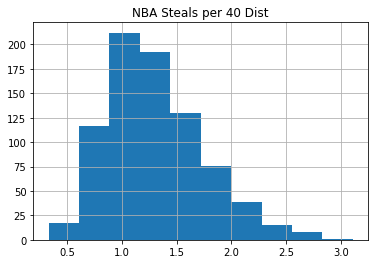

In [137]:
df['nba_steals_per_40'].hist()
plt.title('NBA Steals per 40 Dist')

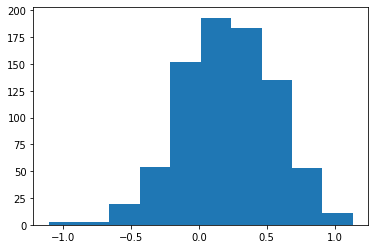

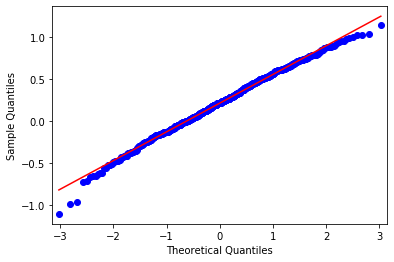

P-value of 0.024 is not greater than .05 and does not meet normality criteria


In [138]:
normality_test(np.log(df['nba_steals_per_40']))

#### Steals per 40 (College)

Text(0.5, 1.0, 'College Career Steals per 40')

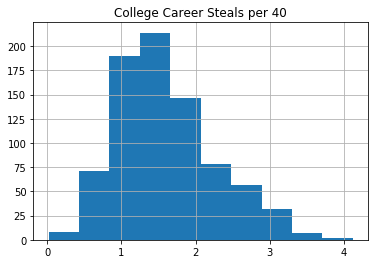

In [139]:
df['steals_per_40'].hist()
plt.title('College Career Steals per 40')

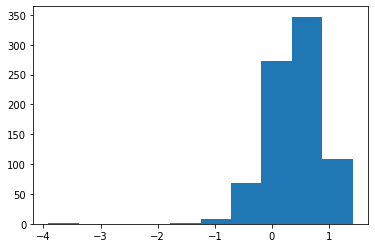

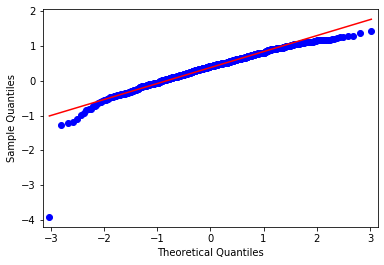

P-value of 0.0 is not greater than .05 and does not meet normality criteria


In [140]:
normality_test(np.log(df['steals_per_40']))

#### Blocks per 40 (College)

Text(0.5, 1.0, 'NBA Blocks per 40 Dist')

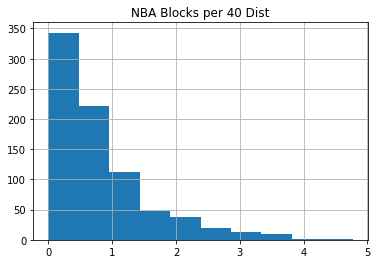

In [141]:
df['nba_blocks_per_40'].hist()
plt.title('NBA Blocks per 40 Dist')

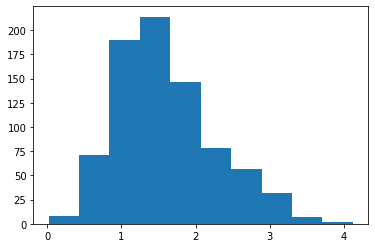

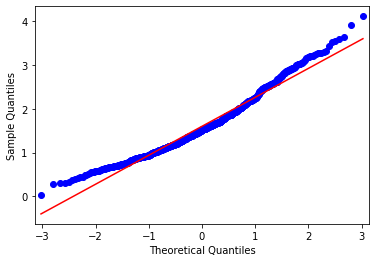

P-value of 0.0 is not greater than .05 and does not meet normality criteria


In [142]:
normality_test(df['steals_per_40'])

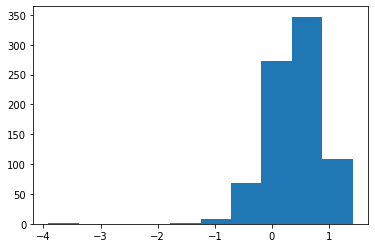

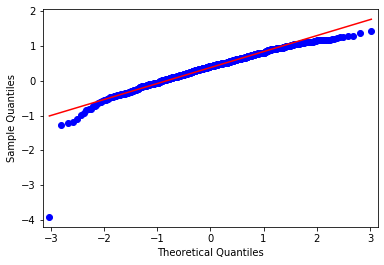

P-value of 0.0 is not greater than .05 and does not meet normality criteria


In [143]:
normality_test(np.log(df['steals_per_40']))

### 1.3 Create Regression - Steals

In [144]:
#create feature to proxy for usage rates
df['usg_per_40'] = df['two_pointers_per_40']+df['three_point_attempts_per_40']+df['free_throw_attempts_per_40']


cont_fields = ['steals_per_40','usg_per_40','personal_fouls_per_40']
cat_fields = ['yrs_played']

response = 'nba_steals_per_40'


Xtrain,Xtest,ytrain,ytest = tts(df,cat_fields,cont_fields,response)

#### 1.3.1 Linear Regression

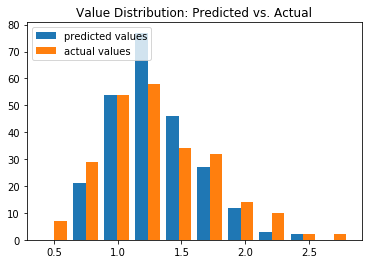

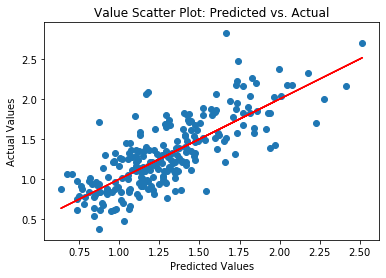

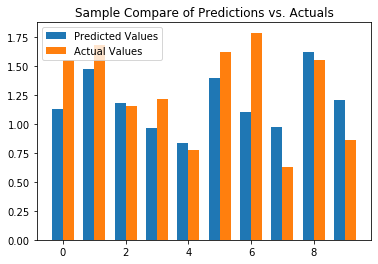

Model Results
-----------------------------------------------
MSE:                 0.078
Explained Variance: 0.595
R^2 Score:          0.594


In [145]:
model1 = LinearRegression()
model1.fit(Xtrain,ytrain)
y_predict = model1.predict(Xtest)
regression_results(y_predict,ytest)

In [146]:
pd.DataFrame({'Feature':Xtrain.columns,'Coefficients':model1.coef_}).sort_values(by='Coefficients',ascending=False)

,Feature,Coefficients
5,steals_per_40,0.348646
4,yrs_played_5,0.023161
2,yrs_played_3,0.011811
0,yrs_played_1,0.001967
7,personal_fouls_per_40,-0.015287
1,yrs_played_2,-0.017575
3,yrs_played_4,-0.019364
6,usg_per_40,-0.092122


In [147]:
results = pd.DataFrame({'Actual':ytest,'Predict':y_predict},index=ytest.index)
results = pd.merge(left=results,right=df['col_lkup'],left_index=True,right_index=True,how='left')
results.sort_values(by='Predict',ascending=False).head(10)

,Actual,Predict,col_lkup
276,2.70,2.515886,Eric Murdock providence
557,2.16,2.414453,Mario Chalmers kansas
80,2.00,2.278433,Bonzi Wells ball-state
649,1.70,2.226114,Rafer Alston fresno-state
346,2.33,2.174611,Jamaal Tinsley iowa-state
702,2.18,2.076281,Ryan Bowen iowa
466,2.18,2.047452,Kenny Battle illinois
327,2.04,2.005977,Iman Shumpert georgia-tech
744,2.37,1.997865,Speedy Claxton hofstra
228,1.43,1.969557,Dion Waiters syracuse


#### 1.3.2 Random Forest Regression

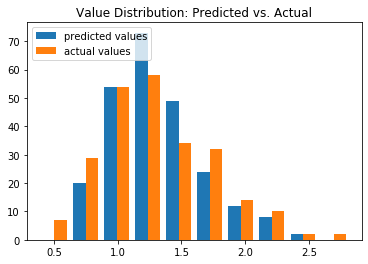

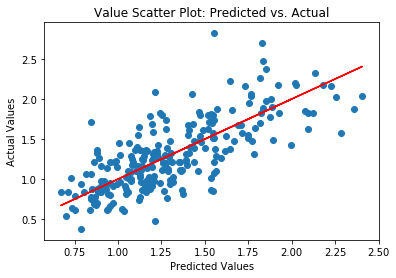

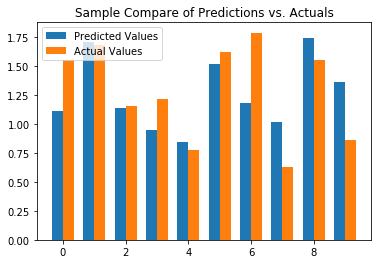

Model Results
-----------------------------------------------
MSE:                 0.087
Explained Variance: 0.548
R^2 Score:          0.548


In [148]:
model2 = RandomForestRegressor()
model2.fit(Xtrain,ytrain)
y_predict = model2.predict(Xtest)
regression_results(y_predict,ytest)

In [149]:
pd.DataFrame({'Feature':Xtrain.columns,'Coefficients':model2.feature_importances_}).sort_values(by='Coefficients',ascending=False)

,Feature,Coefficients
5,steals_per_40,0.670342
6,usg_per_40,0.172267
7,personal_fouls_per_40,0.104868
2,yrs_played_3,0.017214
1,yrs_played_2,0.013624
3,yrs_played_4,0.013307
0,yrs_played_1,0.008002
4,yrs_played_5,0.000376


In [150]:
results = pd.DataFrame({'Actual':ytest,'Predict':y_predict},index=ytest.index)
results = pd.merge(left=results,right=df['col_lkup'],left_index=True,right_index=True,how='left')
results.sort_values(by='Predict',ascending=False).sample(10)

,Actual,Predict,col_lkup
121,1.21,0.8633,Cartier Martin kansas-state
93,1.63,2.0947,Brian Cardinal purdue
87,1.16,1.1099,Brandon Roy washington
205,1.72,1.5361,DeMarre Carroll missouri
791,0.84,0.8996,Tony Snell new-mexico
569,0.84,0.8864,Marty Conlon providence
736,1.55,1.1136,Shawn Respert michigan-state
218,1.21,0.9755,Derrick Favors georgia-tech
70,1.45,1.0617,Bison Dele arizona
557,2.16,2.2269,Mario Chalmers kansas


#### 1.3.3 SVR

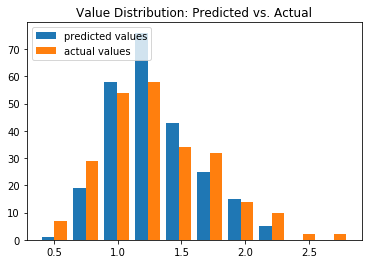

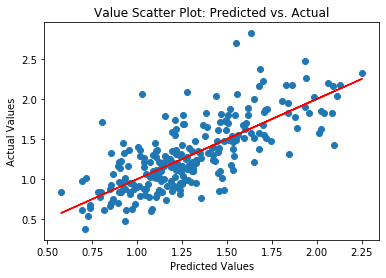

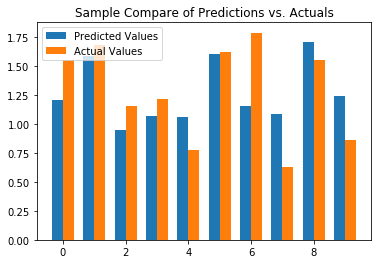

Model Results
-----------------------------------------------
MSE:                 0.087
Explained Variance: 0.547
R^2 Score:          0.546


In [151]:
model3 = SVR()
model3.fit(Xtrain,ytrain)
y_predict = model3.predict(Xtest)
regression_results(y_predict,ytest)

In [152]:
results = pd.DataFrame({'Actual':ytest,'Predict':y_predict},index=ytest.index)
results = pd.merge(left=results,right=df['col_lkup'],left_index=True,right_index=True,how='left')
results.sort_values(by='Predict',ascending=False).head(10)

,Actual,Predict,col_lkup
346,2.33,2.252796,Jamaal Tinsley iowa-state
466,2.18,2.130419,Kenny Battle illinois
327,2.04,2.114655,Iman Shumpert georgia-tech
228,1.43,2.096108,Dion Waiters syracuse
557,2.16,2.091301,Mario Chalmers kansas
269,1.82,2.085611,Emanual Davis delaware-state
297,2.20,2.064428,George Lynch north-carolina
468,1.83,2.042785,Kent Bazemore old-dominion
72,1.85,2.024783,Bo Outlaw houston
93,1.63,2.024466,Brian Cardinal purdue


#### 1.3.4 Stacking Regressor

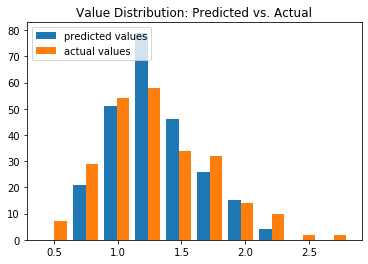

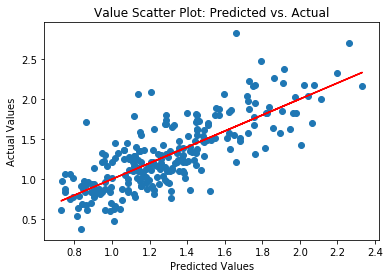

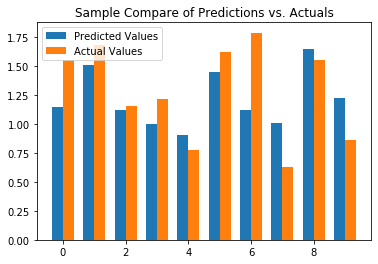

Model Results
-----------------------------------------------
MSE:                 0.076
Explained Variance: 0.603
R^2 Score:          0.602


In [153]:
#embed models in Classifier and use Logistic Regression as Final Estimator
stacking_model = StackingRegressor(
    estimators=[("lr",model1),("rf",model2),("svr",model3)],final_estimator = LinearRegression())

stacking_model.fit(Xtrain,ytrain)
stacking_model_predict = stacking_model.predict(Xtest)
regression_results(stacking_model_predict,ytest)

In [154]:
results = pd.DataFrame({'Actual':ytest,'Predict':stacking_model_predict},index=ytest.index)
results = pd.merge(left=results,right=df['col_lkup'],left_index=True,right_index=True,how='left')
results['diff'] = np.abs(results['Actual']-results['Predict'])
results.sort_values(by='diff',ascending=False).head(10)

,Actual,Predict,col_lkup,diff
560,2.82,1.657455,Mark Macon temple,1.162545
693,2.06,1.136641,Ronnie Price,0.923359
161,2.09,1.209353,Cory Alexander virginia,0.880647
541,1.71,0.858980,Malik Rose drexel,0.851020
240,2.47,1.795137,Doug Christie pepperdine,0.674863
504,0.85,1.522024,Larry Johnson nevada-las-vegas,0.672024
204,1.79,1.119567,DeMarcus Cousins kentucky,0.670433
228,1.43,2.006157,Dion Waiters syracuse,0.576157
562,0.76,1.314847,Mark Pope kentucky,0.554847
355,0.87,1.416514,James Jones miami-fl,0.546514


### 1.4  Create Regression - Blocks

#### 1.4.1 Linear Regression

In [155]:
cont_fields = ['blocks_per_40','personal_fouls_per_40','height']
cat_fields = ['yrs_played']

response = 'nba_blocks_per_40'


Xtrain,Xtest,ytrain,ytest = tts(df,cat_fields,cont_fields,response)

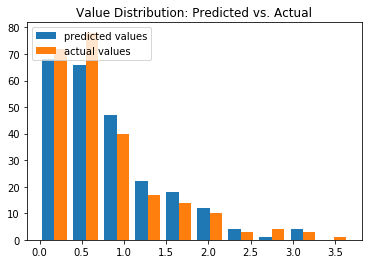

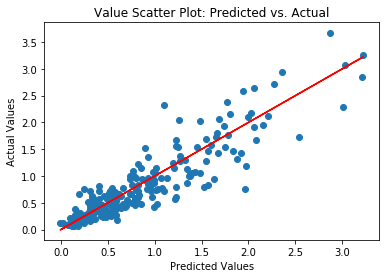

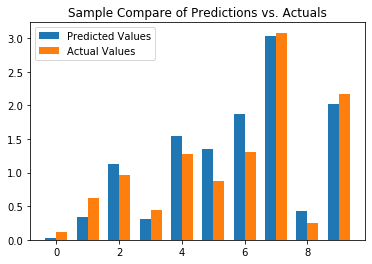

Model Results
-----------------------------------------------
MSE:                 0.084
Explained Variance: 0.813
R^2 Score:          0.809


In [156]:
model1 = LinearRegression()
model1.fit(Xtrain,ytrain)
y_predict = model1.predict(Xtest)
regression_results(y_predict,ytest)

In [157]:
pd.DataFrame({'Feature':Xtrain.columns,'Coefficients':model1.coef_}).sort_values(by='Coefficients',ascending=False)

,Feature,Coefficients
5,blocks_per_40,0.651799
7,height,0.071457
6,personal_fouls_per_40,0.031817
1,yrs_played_2,0.030267
3,yrs_played_4,0.029059
0,yrs_played_1,0.014990
2,yrs_played_3,0.006848
4,yrs_played_5,-0.081164


In [158]:
results = pd.DataFrame({'Actual':ytest,'Predict':y_predict},index=ytest.index)
results = pd.merge(left=results,right=df['col_lkup'],left_index=True,right_index=True,how='left')
results.sort_values(by='Predict',ascending=False).sample(10)

,Actual,Predict,col_lkup
705,1.08,1.424695,Ryan Kelly duke
302,0.41,0.388286,Glen Rice michigan
80,0.42,0.687865,Bonzi Wells ball-state
340,2.39,1.776125,Jahidi White georgetown
76,0.20,0.279207,Bobby Jackson minnesota
99,1.94,1.736928,Brook Lopez stanford
2,1.05,1.479181,Aaron Gray pittsburgh
483,0.78,0.658372,Kirk Snyder nevada
393,0.72,0.522255,Jeremy Lamb connecticut
840,1.15,1.208421,Wilson Chandler depaul


#### 1.4.2 Random Forest Regression

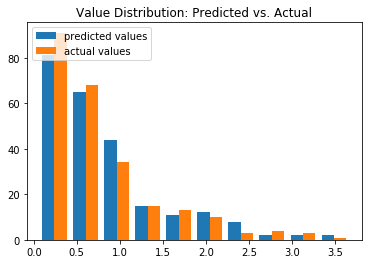

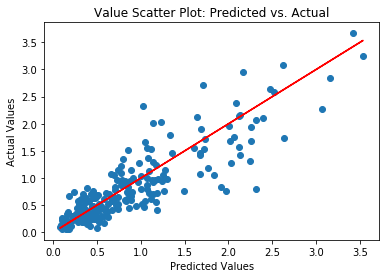

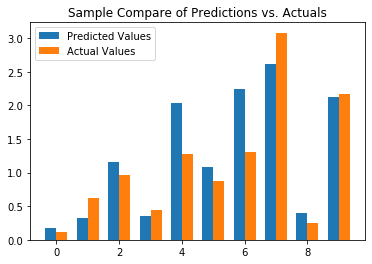

Model Results
-----------------------------------------------
MSE:                 0.117
Explained Variance: 0.741
R^2 Score:          0.734


In [159]:
model2 = RandomForestRegressor()
model2.fit(Xtrain,ytrain)
y_predict = model2.predict(Xtest)
regression_results(y_predict,ytest)

In [160]:
pd.DataFrame({'Feature':Xtrain.columns,'Coefficients':model2.feature_importances_}).sort_values(by='Coefficients',ascending=False)

,Feature,Coefficients
5,blocks_per_40,0.861865
6,personal_fouls_per_40,0.065167
7,height,0.046489
0,yrs_played_1,0.008429
2,yrs_played_3,0.006338
3,yrs_played_4,0.005871
1,yrs_played_2,0.005340
4,yrs_played_5,0.000500


#### 1.4.3 SVR

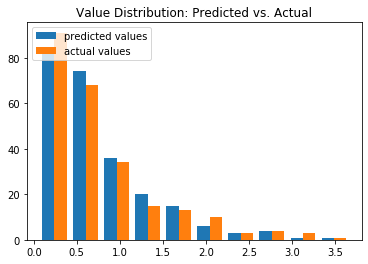

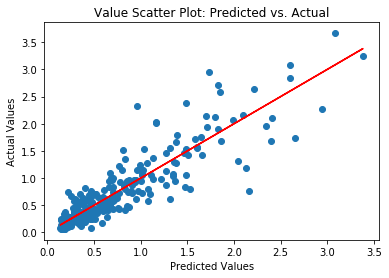

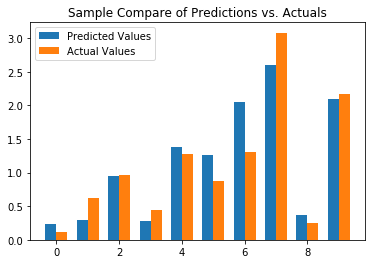

Model Results
-----------------------------------------------
MSE:                 0.098
Explained Variance: 0.776
R^2 Score:          0.776


In [161]:
model3 = SVR()
model3.fit(Xtrain,ytrain)
y_predict = model3.predict(Xtest)
regression_results(y_predict,ytest)

#### 1.4.4 Stacking Regressor

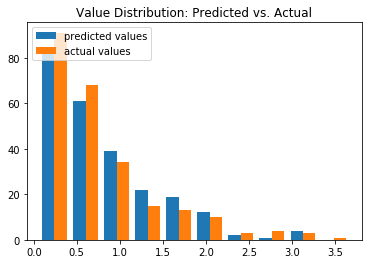

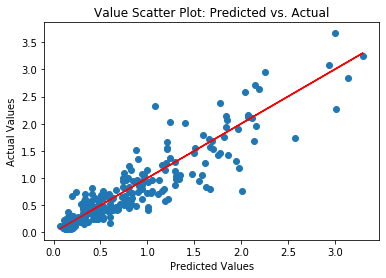

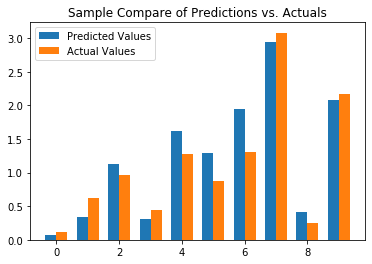

Model Results
-----------------------------------------------
MSE:                 0.085
Explained Variance: 0.81
R^2 Score:          0.806


In [162]:
#embed models in Classifier and use Logistic Regression as Final Estimator
stacking_model = StackingRegressor(
    estimators=[("lr",model1),("rf",model2),("svr",model3)],final_estimator = LinearRegression())

stacking_model.fit(Xtrain,ytrain)
stacking_model_predict = stacking_model.predict(Xtest)
regression_results(stacking_model_predict,ytest)

In [163]:
results = pd.DataFrame({'Actual':ytest,'Predict':stacking_model_predict},index=ytest.index)
results = pd.merge(left=results,right=df['col_lkup'],left_index=True,right_index=True,how='left')
results['diff'] = np.abs(results['Actual']-results['Predict'])
results.sort_values(by='diff',ascending=False).head(10)

,Actual,Predict,col_lkup,diff
488,0.76,2.013673,Kurt Thomas texas-christian,1.253673
681,2.33,1.082074,Robert Traylor michigan,1.247926
586,0.80,1.671430,Meyers Leonard illinois,0.871430
451,1.73,2.574054,Karl-Anthony Towns kentucky,0.844054
413,1.18,1.979776,Joey Dorsey memphis,0.799776
70,2.04,1.243119,Bison Dele arizona,0.796881
148,0.83,1.626021,Chris Wilcox maryland,0.796021
270,2.28,3.011669,Emeka Okafor connecticut,0.731669
72,2.95,2.259742,Bo Outlaw houston,0.690258
412,3.67,3.007443,Joel Przybilla minnesota,0.662557
